# 2a

In [1]:
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_wine
from sklearn.model_selection import cross_val_score
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
def makePoly(deg):
    coefs = np.random.normal(size=deg+1)
    coefs = np.true_divide(coefs,np.sqrt(np.sum(coefs**2)))  
    return coefs

In [3]:
def randSample(numPoints, p, noiseStd):
    xi = np.random.uniform(-1, 1, size=numPoints)
    noise = np.random.normal(scale=noiseStd, size=numPoints)
    p_xi = p(xi + noise)
    return xi, p_xi

In [4]:
def oneFit(numPoints=10, degTarget=4, degFit=2, noiseStd=0.1):
    coefs = makePoly(degTarget)
    p = np.poly1d(coefs)
    xi,pred_xi = randSample(numPoints, p, noiseStd)
    #target function
    plot(p)
    #points
    plt.scatter(xi, pred_xi)
    #predicted graph
    p_prime = np.poly1d(np.polyfit(xi, pred_xi, degFit))
    plot(p_prime)
    #calc e_out
    x = np.arange(-2,2, 0.05)
    y = p(x)
    y_pred = p_prime(x)
    error_out = 0
    for i in range(len(y)):
        error_out += (y[i] - y_pred[i])**2
    error_out = error_out/len(y)
    #calc e_in
    error_in = 0
    for j in range(len(xi)):
        error_in += (p_prime(xi[j]) - pred_xi[j])**2
    error_in = error_in/len(xi)
    return error_in, error_out


In [5]:
def plot(p):
    x = np.arange(-2,2, 0.05)
    y = p(x)
    plt.plot(x, y)

(0.012929975791801778, 2.25158091188388)

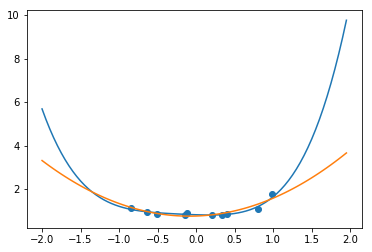

In [6]:
oneFit()

# 2b

In [7]:
#no Plot
def oneFit_noPrint(numPoints=10, degTarget=4, degFit=2, noiseStd=0.1):
    coefs = makePoly(degTarget)
    p = np.poly1d(coefs)
    xi,pred_xi = randSample(numPoints, p, noiseStd)
    p_prime = np.poly1d(np.polyfit(xi, pred_xi, degFit))
    #calc e_out
    x = np.arange(-2,2, 0.05)
    y = p(x)
    y_pred = p_prime(x)
    error_out = 0
    for i in range(len(y)):
        error_out += (y[i] - y_pred[i])**2
    error_out = error_out/len(y)
    #calc e_in
    error_in = 0
    for j in range(len(xi)):
        error_in += (p_prime(xi[j]) - pred_xi[j])**2
    error_in = error_in/len(xi)
    return error_in, error_out

In [8]:
def testRangeDegrees(degrees=6, sampleSize=20, degTarget=4, noiseStd=0.1):
    answer = np.empty((degrees, 2))
    for counter in range(6):
        counter_2 = counter + 1
        b_avg = np.empty((1000,2))
        for i in range(1000):
            exp_in, exp_out = oneFit_noPrint(sampleSize, degTarget, counter_2, noiseStd)
            b_avg[i, 0] = exp_in
            b_avg[i, 1] = exp_out
        answer[counter] = np.mean(b_avg, axis=0)
    return answer
    
a = testRangeDegrees()
a


array([[4.44087945e-02, 6.96669436e+00],
       [1.52368202e-02, 4.27435777e+00],
       [9.97849182e-03, 3.70950625e+00],
       [8.73317273e-03, 6.32141119e+00],
       [7.55428524e-03, 1.03322615e+02],
       [7.53490191e-03, 5.01167410e+03]])

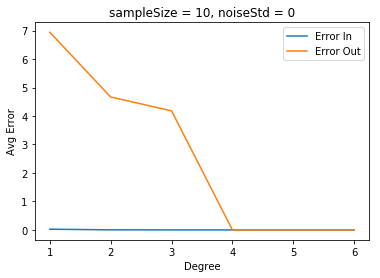

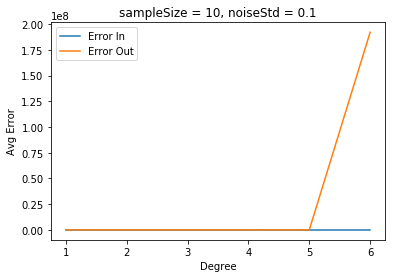

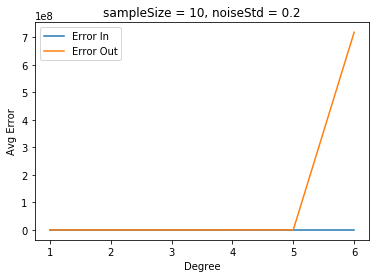

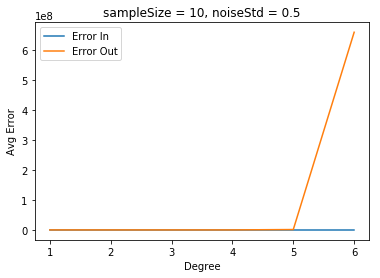

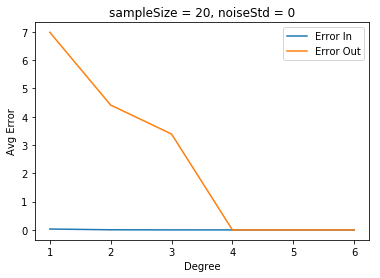

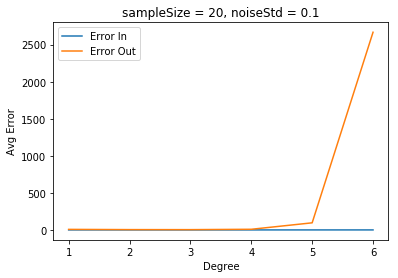

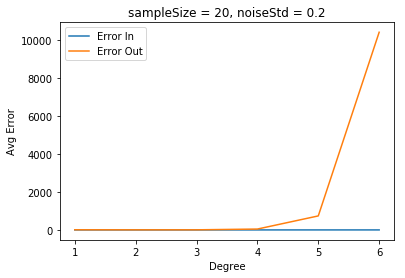

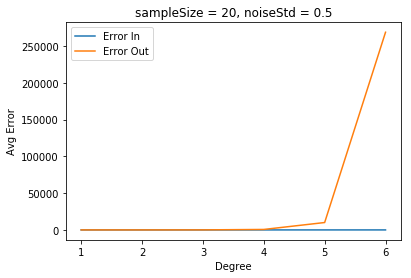

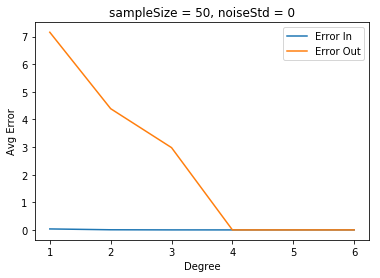

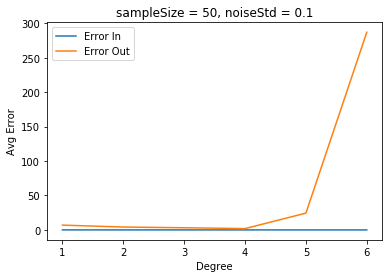

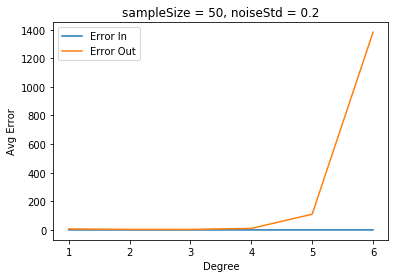

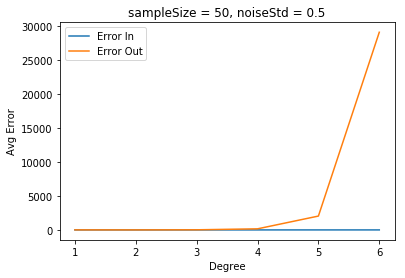

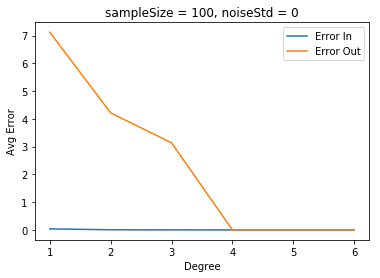

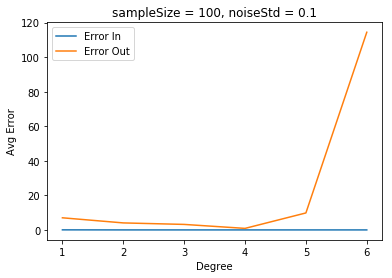

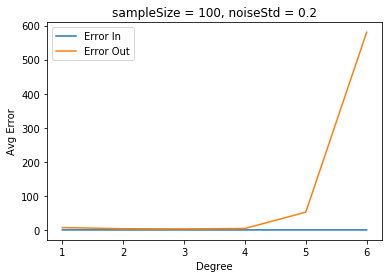

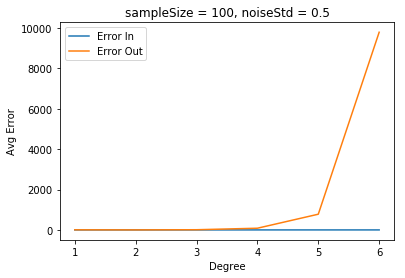

In [9]:
samples = [10, 20, 50, 100]
noise = [0, 0.1, 0.2, 0.5]
x_axis = [1, 2, 3, 4, 5, 6]

for size in samples:
    for n in noise: 
        avg_error = testRangeDegrees(degrees = 6, sampleSize= size, degTarget= 4, noiseStd=n)
        plt.figure()
        plt.plot(x_axis, avg_error[:, [0]], label = 'Error In')
        plt.plot(x_axis, avg_error[:, [1]], label = 'Error Out')
        plt.ylabel("Avg Error")
        plt.xlabel("Degree")
        plt.title("sampleSize = {}, noiseStd = {}".format(size,n))
        plt.legend()
        plt.show()


# 3a

In [10]:
wine = load_wine()
data = wine.data
target = wine.target

In [11]:
n = list(np.arange(-8,9))
x_axis = []
acc = []
for element in n:
    c = 2**(0.5*element)
    x_axis.append(math.log2(c))
    clf = LogisticRegression(solver = 'liblinear', C = c)
    clf.fit(data, target)
    score = cross_val_score(clf, data, target, cv=4)
    acc.append(np.mean(score))

/Users/alexanderxu/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/alexanderxu/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/alexanderxu/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/alexanderxu/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warnin

/Users/alexanderxu/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/alexanderxu/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/alexanderxu/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/alexanderxu/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warnin

/Users/alexanderxu/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


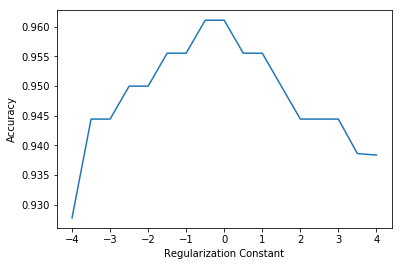

In [12]:
plt.xlabel('Regularization Constant')
plt.ylabel('Accuracy')
plt.plot(x_axis,acc)
plt.show()

# 3b

There looks to be a sweet spot in which the accuracy peeks. This makes sense since the regularization constant, if too big, it would start to block the model from accurately predicting the data. If too small, the noise would still have too much of an effect causing overfitting to occur. The ultimate goal of regularization, when coupled with validation, is to find a constant such that the effect of noise is dimmed while not hurting the model's ability to accurately train on data

# 4a

1602

Leave one out validation means that one sample is not used when validating. The number of samples in the Wine data set is 178, which means there are 178 C 1 ways to pick the sample left out. Since there are three p values and three c values, it makes since that we must train the classifiers 178 C 1 * 3 * 3 times = 1602

# 4b

In [13]:
from sklearn.model_selection import GridSearchCV, LeaveOneOut
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report

In [14]:
numSamples = len(wine.data)
numSamples

178

In [15]:
tuned_parameters = [{'kernel': ['poly'], 'C': [0.5, 1, 2], 'degree': [1,2,4]}]
cross_val = LeaveOneOut()



In [18]:

clf = GridSearchCV(SVC(gamma = 'scale'), tuned_parameters, iid = False)
clf.fit(data, target)
    
print("Best parameters is:")
print(clf.best_params_)
   

/Users/alexanderxu/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Best parameters is:
{'C': 1, 'degree': 2, 'kernel': 'poly'}
